In [76]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import seaborn as sb
from scipy.ndimage import gaussian_filter1d

In [85]:
n_layers = 3
layer_sz = 256
slope = 10
lr = "001"
encode = "rate"
update = "offline"
measure = "accuracy"
#measure = "layer_cosine_similarity"
#measure = "loss"
#measure = "model_cosine_similarity"

In [86]:
data = []
for i in range(4):
    data.append(jnp.load("randman_data/{}/sim_{}layer_{}_3dim_{}_50seqlen_5000iter_0manifold_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,encode,slope,lr,i)))
data = jnp.stack(data)

In [82]:
data = []
for i in range(4):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_3dim_50seqlen_5000iter_{}_sub_10fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,lr,i)))
data = jnp.stack(data)

In [87]:
jnp.mean(data[:,-1],axis=0)

Array([0.8366249 , 0.82745   , 0.8354    , 0.830875  , 0.82432497],      dtype=float32)

In [63]:
jnp.std(data[:,-1],axis=0)

Array([0.01027538, 0.0023786 , 0.01106227, 0.00883599, 0.00719963],      dtype=float32)

In [72]:
jnp.mean(data[:,-1],axis=0)

Array([0.70454997, 0.87102497, 0.78265   , 0.88387495, 0.88637495],      dtype=float32)

In [26]:
data[:,-1]

Array([[0.6943463 , 0.7243816 , 0.7133392 , 0.7301237 , 0.7606007 ],
       [0.70936394, 0.7199647 , 0.7274735 , 0.7358657 , 0.78798586],
       [0.7270318 , 0.7301237 , 0.7199647 , 0.760159  , 0.78798586],
       [0.7177562 , 0.7402827 , 0.72217315, 0.7486749 , 0.77959365],
       [0.7159894 , 0.7376325 , 0.7424912 , 0.72482336, 0.76369256]],      dtype=float32)

In [28]:
data[:,-1]

Array([[0.69876325, 0.7310071 , 0.6810954 , 0.74469966, 0.7606007 ],
       [0.70936394, 0.7217315 , 0.72128975, 0.74293286, 0.78798586],
       [0.7270318 , 0.72482336, 0.7181979 , 0.7575088 , 0.78798586],
       [0.7177562 , 0.7477915 , 0.7173145 , 0.7583922 , 0.77959365],
       [0.71024734, 0.7075972 , 0.699205  , 0.7491166 , 0.76369256]],      dtype=float32)

In [4]:
data.shape

(5, 5001, 4)

In [8]:
data[0,-1]

Array([0.5909894 , 0.57553005, 0.5803887 , 0.6457597 ], dtype=float32)

In [7]:
jnp.std(data[:,-1],axis=0)

Array([0.01559731, 0.00356217, 0.02188353, 0.01146507], dtype=float32)

In [11]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']

In [69]:
gaussian_filter1d(means,sigma=10).shape

(2000, 4)

In [36]:
data = data[:,:,::-1]

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


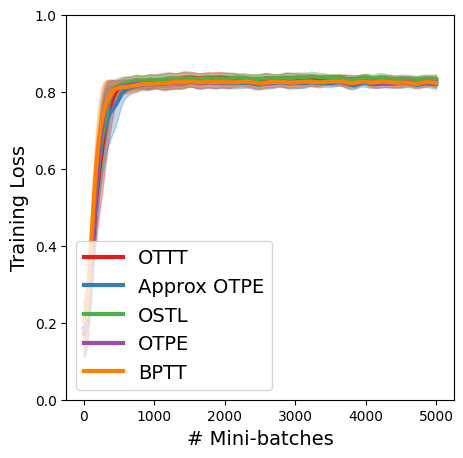

In [88]:
means = jnp.mean(data,axis=0)
old_means = means
stds = jnp.std(data,axis=0)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=50).T
upper = gaussian_filter1d(upper.T, sigma=50).T
lower = gaussian_filter1d(lower.T, sigma=50).T
fig = plt.figure(figsize=(5,5))
#plt.plot(jnp.mean(data,axis=0))
plt.ylim((0,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=14)
plt.ylabel("Training Loss",fontname="Helvetica",fontsize=14)
for i in range(5):
    plt.plot(means[:,i],linewidth=3,color=colors[i])
    #plt.plot(old_means[:,i],'--',linewidth=0.5, alpha=.3,color=colors[i])

for i in range(5):
    plt.fill_between(jnp.arange(5000), lower[:,i], upper[:,i], alpha=0.3,color=colors[i])
    
    
plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower left',fontsize=14)
#plt.arrow(1500,0.95,500,-0.1,lw=0,length_includes_head=True,head_width=0.1,color='r',head_starts_at_zero=False,width=0.01)

In [102]:
jnp.mean(data[:,-1,:],axis=0)

Array([0.7046157 , 0.6952297 , 0.7196334 , 0.7541961 , 0.77329946],      dtype=float32)

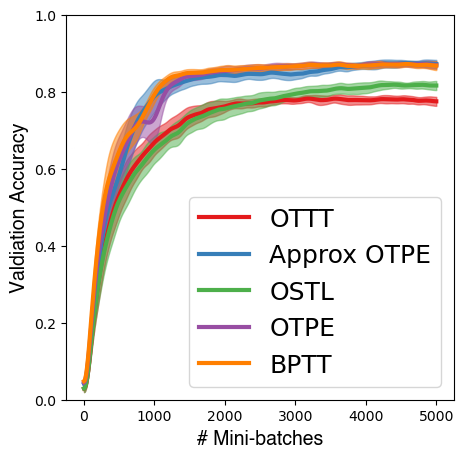

In [232]:
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
fig = plt.figure(figsize=(5,5))

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=50).T
upper = gaussian_filter1d(upper.T, sigma=50).T
lower = gaussian_filter1d(lower.T, sigma=50).T
#plt.plot(jnp.mean(data,axis=0))
plt.ylim((0,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=14)
plt.ylabel("Valdiation Accuracy",fontname="Helvetica",fontsize=14)
for i in range(5):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(5):
    plt.fill_between(jnp.arange(5000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
    
plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)

In [156]:
data.shape

(5, 5000, 4, 6)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


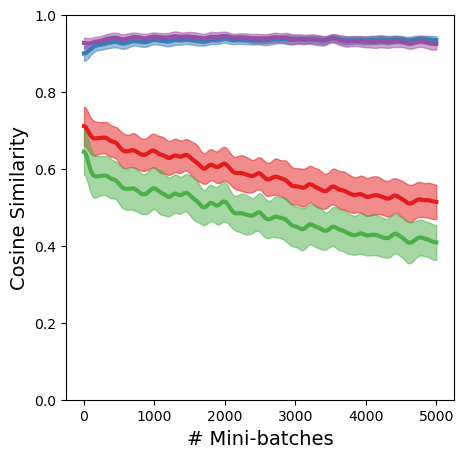

In [46]:
means = jnp.mean(data[:,:,:,5],axis=0)
stds = jnp.std(data[:,:,:,5],axis=0)
fig = plt.figure(figsize=(5,5))
#plt.plot(jnp.mean(data,axis=0))

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=50).T
upper = gaussian_filter1d(upper.T, sigma=50).T
lower = gaussian_filter1d(lower.T, sigma=50).T

plt.ylim((0,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=14)
plt.ylabel("Cosine Similarity",fontname="Helvetica",fontsize=14)

for i in range(4):
    plt.plot(means[:,i],linewidth=3,color=colors[i])
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower right',fontsize=18)
for i in range(4):
    plt.fill_between(jnp.arange(5000), lower[:,i], upper[:,i], alpha=0.5, color=colors[i])

#plt.xticks(fontsize=10);

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


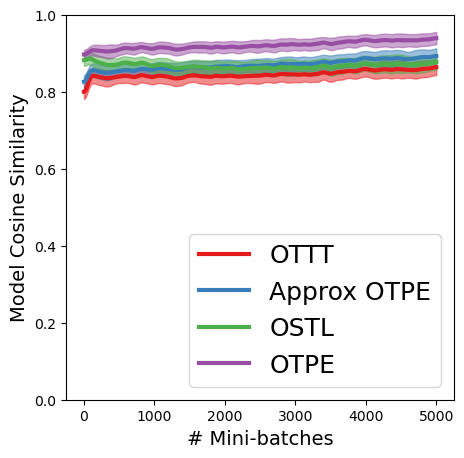

In [77]:
means = jnp.mean(data[:,:,:],axis=0)
stds = jnp.std(data[:,:,:],axis=0)
fig = plt.figure(figsize=(5,5))
#plt.plot(jnp.mean(data,axis=0))

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=50).T
upper = gaussian_filter1d(upper.T, sigma=50).T
lower = gaussian_filter1d(lower.T, sigma=50).T

plt.ylim((0,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=14)
plt.ylabel("Model Cosine Similarity",fontname="Helvetica",fontsize=14)
for i in range(4):
    plt.plot(means[:,i],linewidth=3,color=colors[i])
plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower right',fontsize=18)
for i in range(4):
    plt.fill_between(jnp.arange(5000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])

In [17]:
data.shape

(3, 10001, 5)

In [20]:
vals.shape

(5, 2000, 4, 6)

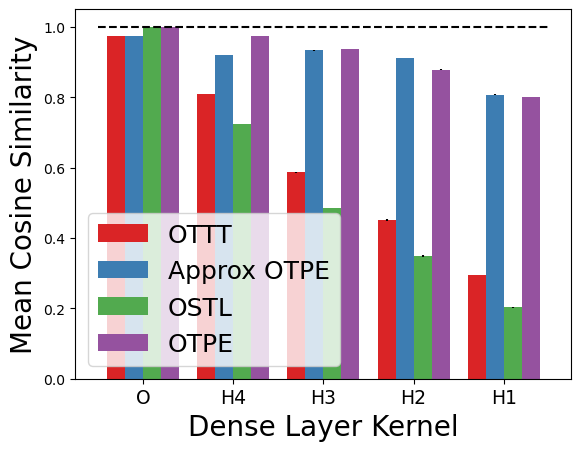

In [73]:
vals = data
#stds = jnp.nanstd(jnp.nanmean(vals,axis=1)[:,:,1::3,2][::-1],axis=0)[:,0:3]
#means = jnp.nanmean(jnp.nanmean(vals,axis=1)[:,:,1::3,2][::-1],axis=0)[:,0:3]
stds = jnp.nanstd(jnp.nanmean(vals,axis=1)[:,:,1::2][::-1],axis=0)
means = jnp.nanmean(jnp.nanmean(vals,axis=1)[:,:,1::2][::-1],axis=0)

plt.bar(jnp.arange(means.shape[1])-0.3,means[0],width=0.2,color=sb.desaturate(colors[0],0.9),yerr=stds[0])
plt.bar(jnp.arange(means.shape[1])-0.1,means[1],width=0.2,color=sb.desaturate(colors[1],0.9),yerr=stds[1])
plt.bar(jnp.arange(means.shape[1])+0.1,means[2],width=0.2,color=sb.desaturate(colors[2],0.9),yerr=stds[2])
plt.bar(jnp.arange(means.shape[1])+0.3,means[3],width=0.2,color=sb.desaturate(colors[3],0.9),yerr=stds[3])
#plt.ylabel('Mean Cosine Similarity')
#plt.xticks([0,1,2],labels=['Hidden Layer 1', 'Hidden Layer 2', 'Output Layer'][::-1])
plt.xticks([0,1,2,3,4],labels=['H1','H2','H3', 'H4', 'O'][::-1])
#plt.xlabel('Layer Kernel')
#plt.title('Layer-wise Cosine Similarity')

plt.xticks(fontsize=13.5)
#ax.tick_params(width=2)
#if k!=0:
    #ax.set_yticklabels([])
    #plt.yticks([])
        #plt.show()
#plt.legend(['OTTT','Approx ODJA-2','ODJA','ODJA-2','BPTT'])
#plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')

#plt.tight_layout()
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'],bbox_to_anchor = (1.02, 0.41), loc='upper right',fontsize=18)
plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower left',fontsize=18)
#plt.suptitle('Randman Time-Encoded (Last Hidden Layer Kernel)')
#plt.suptitle('Randman Time-Encoded (Offline Learning)',fontsize=24,position=(0.5,1.1),fontname='Verdana',weight='bold')
#fig.supxlabel('Dense Layer Kernel',fontsize=20,fontname='Verdana',position=(0.5,-0.05))
#fig.supylabel('Mean Cosine Similarity',fontsize=20,position=(-0.01,0.5),fontname='Verdana')
#plt.tight_layout(pad=0.2)
plt.xlabel('Dense Layer Kernel',fontsize=20)
plt.ylabel('Mean Cosine Similarity',fontsize=20)

plt.hlines(1,-0.5,4.5,'k',linestyle='dashed')

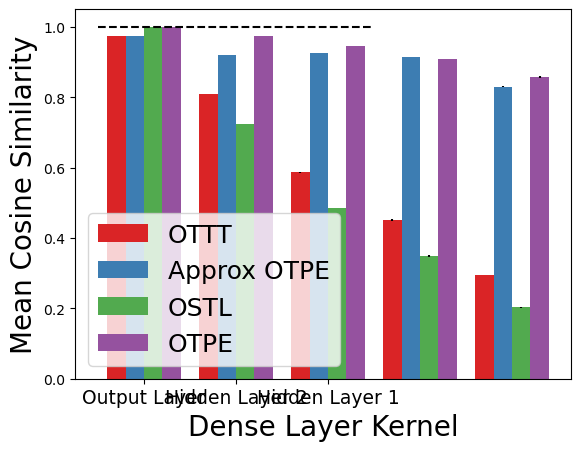

In [19]:
vals = data
#stds = jnp.nanstd(jnp.nanmean(vals,axis=1)[:,:,1::3,2][::-1],axis=0)[:,0:3]
#means = jnp.nanmean(jnp.nanmean(vals,axis=1)[:,:,1::3,2][::-1],axis=0)[:,0:3]
stds = jnp.nanstd(jnp.nanmean(vals,axis=1)[:,:,1::2][::-1],axis=0)
means = jnp.nanmean(jnp.nanmean(vals,axis=1)[:,:,1::2][::-1],axis=0)

plt.bar(jnp.arange(means.shape[1])-0.3,means[0],width=0.2,color=sb.desaturate(colors[0],0.9),yerr=stds[0])
plt.bar(jnp.arange(means.shape[1])-0.1,means[1],width=0.2,color=sb.desaturate(colors[1],0.9),yerr=stds[1])
plt.bar(jnp.arange(means.shape[1])+0.1,means[2],width=0.2,color=sb.desaturate(colors[2],0.9),yerr=stds[2])
plt.bar(jnp.arange(means.shape[1])+0.3,means[3],width=0.2,color=sb.desaturate(colors[3],0.9),yerr=stds[3])
#plt.ylabel('Mean Cosine Similarity')
plt.xticks([0,1,2],labels=['Hidden Layer 1', 'Hidden Layer 2', 'Output Layer'][::-1])
#plt.xlabel('Layer Kernel')
#plt.title('Layer-wise Cosine Similarity')

plt.xticks(fontsize=13.5)
#ax.tick_params(width=2)
#if k!=0:
    #ax.set_yticklabels([])
    #plt.yticks([])
        #plt.show()
#plt.legend(['OTTT','Approx ODJA-2','ODJA','ODJA-2','BPTT'])
#plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')

#plt.tight_layout()
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'],bbox_to_anchor = (1.02, 0.41), loc='upper right',fontsize=18)
plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower left',fontsize=18)
#plt.suptitle('Randman Time-Encoded (Last Hidden Layer Kernel)')
#plt.suptitle('Randman Time-Encoded (Offline Learning)',fontsize=24,position=(0.5,1.1),fontname='Verdana',weight='bold')
#fig.supxlabel('Dense Layer Kernel',fontsize=20,fontname='Verdana',position=(0.5,-0.05))
#fig.supylabel('Mean Cosine Similarity',fontsize=20,position=(-0.01,0.5),fontname='Verdana')
#plt.tight_layout(pad=0.2)
plt.xlabel('Dense Layer Kernel',fontsize=20)
plt.ylabel('Mean Cosine Similarity',fontsize=20)

plt.hlines(1,-0.5,2.5,'k',linestyle='dashed')

In [54]:
means

Array([[0.98219985, 0.8210231 , 0.5194133 ],
       [0.98219985, 0.94464093, 0.851886  ],
       [1.        , 0.75501937, 0.4444601 ],
       [1.        , 0.9857582 , 0.9322559 ]], dtype=float32)

In [57]:
means

Array([[0.98219985, 0.8210231 , 0.5194133 ],
       [0.98219985, 0.94464093, 0.851886  ],
       [1.        , 0.75501937, 0.4444601 ],
       [1.        , 0.9857582 , 0.9249433 ]], dtype=float32)

In [101]:
data = []
for i in range(5):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_3dim_20seqlen_5000iter_{}_sub_10fs_adamax_lr001_{}seed.npy".format(measure,n_layers,layer_sz,update,i)))
data = jnp.stack(data)

In [10]:
jnp.max(data[:,-1,:],axis=0)

Array([0.5424028 , 0.61616606, 0.5490283 , 0.6227915 , 0.6360424 ],      dtype=float32)

In [93]:
jnp.max(data[:,-1,:],axis=0)

Array([0.63206714, 0.6674028 , 0.6325088 , 0.69611305, 0.7040636 ],      dtype=float32)

In [96]:
jnp.max(data[:,-1,:],axis=0)

Array([0.64310956, 0.5790636 , 0.6581272 , 0.64620143], dtype=float32)

In [111]:
jnp.max(data[:,:],axis=1)

Array([[0.8968    , 0.92029995, 0.889     , 0.914     ],
       [0.84999996, 0.9027    , 0.8682    , 0.9029    ],
       [0.8691    , 0.90129995, 0.8846    , 0.89659995],
       [0.88629997, 0.9016    , 0.8839    , 0.9133    ],
       [0.8772    , 0.9059    , 0.8921    , 0.91179997]], dtype=float32)